In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gate import AddGate, MultiplyGate, DotGate, BiasGate, SigmoidGate, ReluGate, SoftmaxGate

In [2]:
np.random.seed(1)

In [3]:
def load_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        pass
        
    X = X.T
    Y = Y.T

    return X, Y

In [4]:
X, Y = load_dataset()

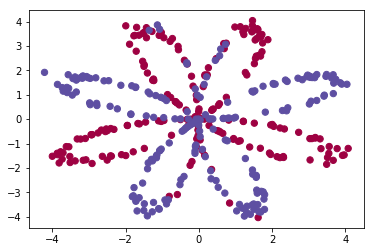

In [5]:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


In [7]:
W1 = np.random.randn(24, 2) * np.sqrt(2 / 2)
b1 = np.zeros((24, 1))
W2 = np.random.randn(7, 24) * np.sqrt(2 / 24)
b2 = np.zeros((7, 1))
W3 = np.random.randn(1, 7) * np.sqrt(2 / 7)
b3 = np.zeros((1, 1))

In [8]:
d1 = DotGate()
z1 = BiasGate()
a1 = ReluGate()
d2 = DotGate()
z2 = BiasGate()
a2 = ReluGate()
d3 = DotGate()
z3 = BiasGate()
a3 = SigmoidGate()

In [9]:
n, m = X.shape
costs = []
lr = 0.025
for i in range(20000):
    # forward
    D1 = d1.forward(W1, X)
    Z1 = z1.forward(D1, b1)
    A1 = a1.forward(Z1)
    D2 = d2.forward(W2, A1)
    Z2 = z2.forward(D2, b2)
    A2 = a2.forward(Z2)
    D3 = d3.forward(W3, Z2)
    Z3 = z3.forward(D3, b3)
    A3 = a3.forward(Z3)
    # cost
    logprobs = np.multiply(-np.log(A3),Y) + \
    np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1.0/m * np.nansum(logprobs)
    cost = np.squeeze(cost)
    costs.append(cost)
    # backward
    dA3 = 1.0/m * (-(Y/A3) + (1-Y)/(1-A3))
    dZ3 = a3.backward(dA3)
    dD3, db3 = z3.backward(dZ3)
    dW3, dA2 = d3.backward(dD3)
    dZ2 = a3.backward(dA2)
    dD2, db2 = z2.backward(dZ2)
    dW2, dA1 = d2.backward(dD2)
    dZ1 = a1.backward(dA1)
    dD1, db1 = z1.backward(dZ1)
    dW1, _ = d1.backward(dD1)
    # update
    W3 = W3 - lr*dW3
    b3 = b3 - lr*db3
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2
    W1 = W1 - lr*dW1
    b1 = b1 - lr*db1
    if i % 500 == 0 :
        print(cost)
        pass
    pass

0.9434253636639968
0.667960272639356
0.6638785301957616
0.6594939850928572
0.6526467314239797
0.6396350345976204
0.6169178094853818
0.5788954993433391
0.5243032391274729
0.47050026387161953
0.43398199403972954
0.41150428178430987
0.3972905728717757
0.3873248280584272
0.37939291214838394
0.37201343505599693
0.3648738909238011
0.3578304188874402
0.3508988553984979
0.3443327192839729
0.33757408159184693
0.330723618051249
0.3245261817105958
0.3186312538178504
0.3133734470781751
0.30852009099786915
0.30423466477030237
0.30018276912632375
0.29666650752699203
0.29354770124156526
0.29076168749072895
0.2881386136000286
0.2855565301447342
0.2828154367230452
0.2802503546875023
0.2776737156796555
0.27505598117826535
0.272503975742343
0.27033992255314687
0.26842320610700865


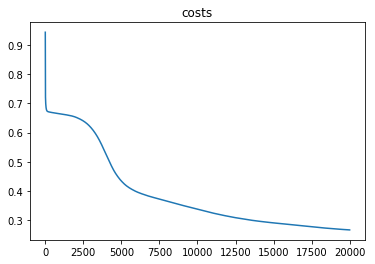

In [10]:
plt.plot(costs)
plt.title('costs')
plt.show()

In [11]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [12]:
def predict(X):
    # forward
    D1 = d1.forward(W1, X)
    Z1 = z1.forward(D1, b1)
    A1 = a1.forward(Z1)
    D2 = d2.forward(W2, A1)
    Z2 = z2.forward(D2, b2)
    A2 = a2.forward(Z2)
    D3 = d3.forward(W3, Z2)
    Z3 = z3.forward(D3, b3)
    A3 = a3.forward(Z3)
    predictions = np.array([0 if i <= 0.5 else 1 for i in np.squeeze(A3)])
    return predictions

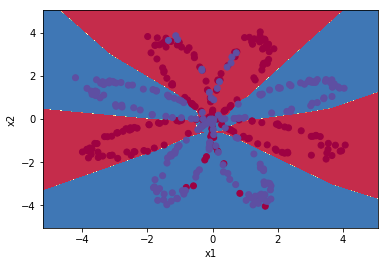

In [13]:
plot_decision_boundary(lambda x: predict(x.T), X, Y[0, :])